# Library Instalation & Import

In [1]:
# install semua library yang diperlukan
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install Sastrawi
!pip install deep-translator
!pip install textblob

In [2]:
# untuk memanipulasi data pada DataFrame
import pandas as pd

# untuk operasi aritmatika
import numpy as np

# untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

#untuk cleaning data
import string
import re

# untuk stopword dan stemming
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# untuk translate data ke bahasa tertentu
from deep_translator import GoogleTranslator
import time

# untuk memberikan sentimen pada data berbahasa inggris
from textblob import TextBlob

from sklearn.model_selection import train_test_split        # untuk membagi data menjadi data latih (training) dan data uji (testing)
from sklearn.feature_extraction.text import TfidfVectorizer # untuk melakukan pembobotan pada tiap kata 


# Crawl Data From Twitter (X)

In [3]:
#@title Twitter Auth Token
twitter_auth_token = '08b419d8d9ad4e71194791ae90190152f2c4f168' # change this auth token

# Crawl Data
filename = 'harga_beras.csv'
search_keyword = 'harga_beras since:2025-06-01 until:2025-11-30 lang:id'
limit = 500

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret! Don't share it with anyone else.
Note: This script only runs on your local device.


Opening twitter search page...


Filling in keywords: harga_beras since:2025-06-01 until:2025-11-30 lang:id


-- Scrolling... (1)

Your tweets saved to: C:\tugas\NLP\uts\tweets-data\harga_beras.csv
Total tweets saved: 20

-- Scrolling... (1) (2)

Your tweets saved to: C:\tugas\NLP\uts\tweets-data\harga_beras.csv
Total tweets saved: 40


Your tweets saved to: C:\tugas\NLP\uts\tweets-data\harga_beras.csv
Total tweets saved: 60

-- Scrolling... (1)

Your tweets saved to: C:\tugas\NLP\uts\tweets-data\harga_beras.csv
Total tweets saved: 80


Your tweets saved to: C:\tugas\NLP\uts\tweets-data\harga_beras.csv
Total tweets saved: 100


Your tweet

In [4]:
# Read the CSV file into a pandas DataFrame
scrape_result = pd.read_csv("tweets-data/harga_beras.csv")

# Display the DataFrame
scrape_result

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988141606898463107,Tue Nov 11 07:07:51 +0000 2025,0,Gerakan pasar murah (GPM) terus di lakukan set...,1988141606898463107,https://pbs.twimg.com/media/G5dMQAJbcAQIF0F.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198814160689846...,1432181802551037953,NaN
1,1988138513104335118,Tue Nov 11 06:55:34 +0000 2025,0,Polsek Kuala Kencana menggelar kegiatan Pasar ...,1988138513104335118,https://pbs.twimg.com/media/G5dJKi0bcAA4oYc.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813851310433...,1422182349249277954,NaN
2,1988138163513291057,Tue Nov 11 06:54:10 +0000 2025,0,Polsek Kuala Kencana menggelar kegiatan Pasar ...,1988138163513291057,https://pbs.twimg.com/media/G5dJG94bEAA3Op5.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813816351329...,1250270588704182272,NaN
3,1988133262968103064,Tue Nov 11 06:34:42 +0000 2025,0,Pemerintah terus memperkuat ketahanan pangan m...,1988133262968103064,https://pbs.twimg.com/media/G5dEnabbcAQgG_k.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813326296810...,1620295138840035329,NaN
4,1988131974352121896,Tue Nov 11 06:29:35 +0000 2025,0,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,1988131974352121896,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813197435212...,1389817105722187778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1985288871127752849,Mon Nov 03 10:12:06 +0000 2025,0,Harga Beras-Ketela Turun Papua Pegunungan Cata...,1985288871127752849,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198528887112775...,847372542830444544,NaN
496,1985288239868174847,Mon Nov 03 10:09:39 +0000 2025,0,Tapi kabar baiknya beberapa bahan makanan just...,1985288255319965822,NaN,InvestorID,in,NaN,0,1,0,https://x.com/undefined/status/198528825531996...,238091066,NaN
497,1985286987121832050,Mon Nov 03 10:04:37 +0000 2025,0,Monitoring Harga Beras di Pasar Tradisional da...,1985286987121832050,https://pbs.twimg.com/ext_tw_video_thumb/19852...,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198528698712183...,1909524137699393536,NaN
498,1985284299671888352,Mon Nov 03 09:53:56 +0000 2025,0,Dalam rangka mendukung program ketahanan panga...,1985284299671888352,https://pbs.twimg.com/ext_tw_video_thumb/19852...,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198528429967188...,1743123779877064704,NaN


In [5]:
# Cek jumlah data yang didapatkan

num_tweets = len(scrape_result)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 500.


**Summary**: Melakukan scraping data dari twitter sebanyak 500 data dengan keyword harga beras, lalu menyimpan hasil scraping dalam bentuk file .csv

# Load Dataset

In [6]:
df = pd.read_csv('tweets-data/harga_beras.csv')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1988141606898463107,Tue Nov 11 07:07:51 +0000 2025,0,Gerakan pasar murah (GPM) terus di lakukan set...,1988141606898463107,https://pbs.twimg.com/media/G5dMQAJbcAQIF0F.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198814160689846...,1432181802551037953,NaN
1,1988138513104335118,Tue Nov 11 06:55:34 +0000 2025,0,Polsek Kuala Kencana menggelar kegiatan Pasar ...,1988138513104335118,https://pbs.twimg.com/media/G5dJKi0bcAA4oYc.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813851310433...,1422182349249277954,NaN
2,1988138163513291057,Tue Nov 11 06:54:10 +0000 2025,0,Polsek Kuala Kencana menggelar kegiatan Pasar ...,1988138163513291057,https://pbs.twimg.com/media/G5dJG94bEAA3Op5.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813816351329...,1250270588704182272,NaN
3,1988133262968103064,Tue Nov 11 06:34:42 +0000 2025,0,Pemerintah terus memperkuat ketahanan pangan m...,1988133262968103064,https://pbs.twimg.com/media/G5dEnabbcAQgG_k.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813326296810...,1620295138840035329,NaN
4,1988131974352121896,Tue Nov 11 06:29:35 +0000 2025,0,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,1988131974352121896,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198813197435212...,1389817105722187778,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1985288871127752849,Mon Nov 03 10:12:06 +0000 2025,0,Harga Beras-Ketela Turun Papua Pegunungan Cata...,1985288871127752849,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198528887112775...,847372542830444544,NaN
496,1985288239868174847,Mon Nov 03 10:09:39 +0000 2025,0,Tapi kabar baiknya beberapa bahan makanan just...,1985288255319965822,NaN,InvestorID,in,NaN,0,1,0,https://x.com/undefined/status/198528825531996...,238091066,NaN
497,1985286987121832050,Mon Nov 03 10:04:37 +0000 2025,0,Monitoring Harga Beras di Pasar Tradisional da...,1985286987121832050,https://pbs.twimg.com/ext_tw_video_thumb/19852...,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198528698712183...,1909524137699393536,NaN
498,1985284299671888352,Mon Nov 03 09:53:56 +0000 2025,0,Dalam rangka mendukung program ketahanan panga...,1985284299671888352,https://pbs.twimg.com/ext_tw_video_thumb/19852...,NaN,in,NaN,0,0,0,https://x.com/undefined/status/198528429967188...,1743123779877064704,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      500 non-null    int64  
 1   created_at               500 non-null    object 
 2   favorite_count           500 non-null    int64  
 3   full_text                500 non-null    object 
 4   id_str                   500 non-null    int64  
 5   image_url                189 non-null    object 
 6   in_reply_to_screen_name  210 non-null    object 
 7   lang                     500 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              500 non-null    int64  
 10  reply_count              500 non-null    int64  
 11  retweet_count            500 non-null    int64  
 12  tweet_url                500 non-null    object 
 13  user_id_str              500 non-null    int64  
 14  username                 0

In [8]:
# filter kolom yang digunakan hanya teks ulasan 
df = df.drop(columns=['conversation_id_str', 'created_at', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'location', 'username'])
df = df.rename(columns={'full_text': 'tweet_text'})
df

,tweet_text
0,Gerakan pasar murah (GPM) terus di lakukan set...
1,Polsek Kuala Kencana menggelar kegiatan Pasar ...
2,Polsek Kuala Kencana menggelar kegiatan Pasar ...
3,Pemerintah terus memperkuat ketahanan pangan m...
4,Ironi! Harga Beras Naik Saat Stok Beras Capai ...
...,...
495,Harga Beras-Ketela Turun Papua Pegunungan Cata...
496,Tapi kabar baiknya beberapa bahan makanan just...
497,Monitoring Harga Beras di Pasar Tradisional da...
498,Dalam rangka mendukung program ketahanan panga...


In [9]:
df.isna().sum()

tweet_text    0
dtype: int64

# Text Preprocessing


## Case Folding

In [10]:
# Fungsi Case Folding dengan parameter text.lower()
def case_folding(text):
    return text.lower()

# Tampilkan hasil case folding
df['tweet_casefolding']= df['tweet_text'].apply(case_folding)
df

,tweet_text,tweet_casefolding
0,Gerakan pasar murah (GPM) terus di lakukan set...,gerakan pasar murah (gpm) terus di lakukan set...
1,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...
2,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...
3,Pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...
4,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,ironi! harga beras naik saat stok beras capai ...
...,...,...
495,Harga Beras-Ketela Turun Papua Pegunungan Cata...,harga beras-ketela turun papua pegunungan cata...
496,Tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...
497,Monitoring Harga Beras di Pasar Tradisional da...,monitoring harga beras di pasar tradisional da...
498,Dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...


## Remove Symbol

In [11]:
def cleansing_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Hapus URL
    text = re.sub(r"@\w+", ' ', text)                     # Hapus mention
    text = re.sub(r"#\w+", ' ', text)                     # Hapus hashtag
    text = re.sub(r"\d+", ' ', text)                      # Hapus angka
    text = re.sub(r"[^\w\s]", ' ', text)                  # Hapus tanda baca
    text = re.sub(r"\s+", ' ', text).strip()             # Hapus spasi berlebih
    text = re.sub(r"[^\x00-\x7F]+", ' ', text)             # Hapus emoji dan karakter non-ASCII
    return text

# Tampilkan hasil cleansing
df['tweet_cleaning']= df['tweet_casefolding'].apply(cleansing_text)
df

,tweet_text,tweet_casefolding,tweet_cleaning
0,Gerakan pasar murah (GPM) terus di lakukan set...,gerakan pasar murah (gpm) terus di lakukan set...,gerakan pasar murah gpm terus di lakukan setia...
1,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...
2,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...
3,Pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...
4,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,ironi! harga beras naik saat stok beras capai ...,ironi harga beras naik saat stok beras capai j...
...,...,...,...
495,Harga Beras-Ketela Turun Papua Pegunungan Cata...,harga beras-ketela turun papua pegunungan cata...,harga beras ketela turun papua pegunungan cata...
496,Tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...
497,Monitoring Harga Beras di Pasar Tradisional da...,monitoring harga beras di pasar tradisional da...,monitoring harga beras di pasar tradisional da...
498,Dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...


## Tokenize 

In [13]:
# Fungsi tokenisasi teks
def tokenisasi_teks(text):
    if isinstance(text, str):
        # Tokenisasi dengan regex: ambil hanya kata-kata
        return re.findall(r'\b\w+\b', text)
    return []

df['tweet_tokenize'] = df['tweet_cleaning'].apply(tokenisasi_teks)
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_tokenize
0,Gerakan pasar murah (GPM) terus di lakukan set...,gerakan pasar murah (gpm) terus di lakukan set...,gerakan pasar murah gpm terus di lakukan setia...,"[gerakan, pasar, murah, gpm, terus, di, lakuka..."
1,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,"[polsek, kuala, kencana, menggelar, kegiatan, ..."
2,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,"[polsek, kuala, kencana, menggelar, kegiatan, ..."
3,Pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,"[pemerintah, terus, memperkuat, ketahanan, pan..."
4,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,ironi! harga beras naik saat stok beras capai ...,ironi harga beras naik saat stok beras capai j...,"[ironi, harga, beras, naik, saat, stok, beras,..."
...,...,...,...,...
495,Harga Beras-Ketela Turun Papua Pegunungan Cata...,harga beras-ketela turun papua pegunungan cata...,harga beras ketela turun papua pegunungan cata...,"[harga, beras, ketela, turun, papua, pegununga..."
496,Tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,"[tapi, kabar, baiknya, beberapa, bahan, makana..."
497,Monitoring Harga Beras di Pasar Tradisional da...,monitoring harga beras di pasar tradisional da...,monitoring harga beras di pasar tradisional da...,"[monitoring, harga, beras, di, pasar, tradisio..."
498,Dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,"[dalam, rangka, mendukung, program, ketahanan,..."


## Stopword

In [14]:
# Inisialisasi stopword Sastrawi
factory = StopWordRemoverFactory()
stop_words = set(factory.get_stop_words())

# Fungsi hapus stopword (menggunakan hasil tokenisasi)
def stopword_teks(token):
    if isinstance(token, list):
        filtered = [word for word in token if word not in stop_words]
        return ' '.join(filtered)
    return ''

df['tweet_stopword'] = df['tweet_tokenize'].apply(stopword_teks)
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_tokenize,tweet_stopword
0,Gerakan pasar murah (GPM) terus di lakukan set...,gerakan pasar murah (gpm) terus di lakukan set...,gerakan pasar murah gpm terus di lakukan setia...,"[gerakan, pasar, murah, gpm, terus, di, lakuka...",gerakan pasar murah gpm terus lakukan harinya ...
1,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,"[polsek, kuala, kencana, menggelar, kegiatan, ...",polsek kuala kencana menggelar kegiatan pasar ...
2,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,"[polsek, kuala, kencana, menggelar, kegiatan, ...",polsek kuala kencana menggelar kegiatan pasar ...
3,Pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,"[pemerintah, terus, memperkuat, ketahanan, pan...",pemerintah terus memperkuat ketahanan pangan m...
4,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,ironi! harga beras naik saat stok beras capai ...,ironi harga beras naik saat stok beras capai j...,"[ironi, harga, beras, naik, saat, stok, beras,...",ironi harga beras naik stok beras capai juta t...
...,...,...,...,...,...
495,Harga Beras-Ketela Turun Papua Pegunungan Cata...,harga beras-ketela turun papua pegunungan cata...,harga beras ketela turun papua pegunungan cata...,"[harga, beras, ketela, turun, papua, pegununga...",harga beras ketela turun papua pegunungan cata...
496,Tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,"[tapi, kabar, baiknya, beberapa, bahan, makana...",kabar baiknya beberapa bahan makanan justru tu...
497,Monitoring Harga Beras di Pasar Tradisional da...,monitoring harga beras di pasar tradisional da...,monitoring harga beras di pasar tradisional da...,"[monitoring, harga, beras, di, pasar, tradisio...",monitoring harga beras pasar tradisional retai...
498,Dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,"[dalam, rangka, mendukung, program, ketahanan,...",rangka mendukung program ketahanan pangan pols...


## Stemming

In [15]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming menggunakan Sastrawi
def stem_text(text):
    if isinstance(text, str):
        return stemmer.stem(text)
    return ''
df['tweet_stemming'] = df['tweet_stopword'].apply(stem_text)
df

,tweet_text,tweet_casefolding,tweet_cleaning,tweet_tokenize,tweet_stopword,tweet_stemming
0,Gerakan pasar murah (GPM) terus di lakukan set...,gerakan pasar murah (gpm) terus di lakukan set...,gerakan pasar murah gpm terus di lakukan setia...,"[gerakan, pasar, murah, gpm, terus, di, lakuka...",gerakan pasar murah gpm terus lakukan harinya ...,gera pasar murah gpm terus laku hari perum bul...
1,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,"[polsek, kuala, kencana, menggelar, kegiatan, ...",polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana gelar giat pasar murah ba...
2,Polsek Kuala Kencana menggelar kegiatan Pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana menggelar kegiatan pasar ...,"[polsek, kuala, kencana, menggelar, kegiatan, ...",polsek kuala kencana menggelar kegiatan pasar ...,polsek kuala kencana gelar giat pasar murah ba...
3,Pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,pemerintah terus memperkuat ketahanan pangan m...,"[pemerintah, terus, memperkuat, ketahanan, pan...",pemerintah terus memperkuat ketahanan pangan m...,perintah terus kuat tahan pangan lalu luas dis...
4,Ironi! Harga Beras Naik Saat Stok Beras Capai ...,ironi! harga beras naik saat stok beras capai ...,ironi harga beras naik saat stok beras capai j...,"[ironi, harga, beras, naik, saat, stok, beras,...",ironi harga beras naik stok beras capai juta t...,ironi harga beras naik stok beras capai juta t...
...,...,...,...,...,...,...
495,Harga Beras-Ketela Turun Papua Pegunungan Cata...,harga beras-ketela turun papua pegunungan cata...,harga beras ketela turun papua pegunungan cata...,"[harga, beras, ketela, turun, papua, pegununga...",harga beras ketela turun papua pegunungan cata...,harga beras ketela turun papua gunung catat de...
496,Tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,tapi kabar baiknya beberapa bahan makanan just...,"[tapi, kabar, baiknya, beberapa, bahan, makana...",kabar baiknya beberapa bahan makanan justru tu...,kabar baik beberapa bahan makan justru turun h...
497,Monitoring Harga Beras di Pasar Tradisional da...,monitoring harga beras di pasar tradisional da...,monitoring harga beras di pasar tradisional da...,"[monitoring, harga, beras, di, pasar, tradisio...",monitoring harga beras pasar tradisional retai...,monitoring harga beras pasar tradisional retai...
498,Dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,dalam rangka mendukung program ketahanan panga...,"[dalam, rangka, mendukung, program, ketahanan,...",rangka mendukung program ketahanan pangan pols...,rangka dukung program tahan pangan polsek suba...


In [16]:
# Simpan hasil tahapan preprocessing dalam file csv
df.to_csv('hargaberas_preprocessing.csv', index=False)

In [17]:
# Hapus baris dengan nilai kosong atau string kosong 
df_bersih = df[df['tweet_stemming'].notna()]                 # Hapus NaN / nilai kosong
df_bersih = df_bersih[df_bersih['tweet_stemming'].str.strip() != '']  # Hapus string kosong

# Simpan ulasan yang sudah bersih
df_bersih[['tweet_stemming']].rename(columns={'tweet_stemming': 'clean_tweet'}).to_csv('hargaberas_clean.csv', index=False)

In [18]:
# cek jika masih ada nilai kosong pada tweet
data_bersih = pd.read_csv('hargaberas_clean.csv')
data_bersih.isnull().sum()

clean_tweet    0
dtype: int64

In [19]:
# Menghapus nilai kosong atau NaN pada dataset
data_bersih = data_bersih.dropna(subset=['clean_tweet'])

**Summary**: Melakukan preprocessing pada data tweet hasil scraping dengan tahapan berikut:
1. *Casefolding*
2. *Remove Symbol*
3. *Tokenize* 
4. *Stopword* menggunakan Sastrawi
5. *Stemming* menggunakan Sastrawi

# Ekstraksi Fitur (TF-IDF)

In [30]:
# Menggunakan TfidfVectorizer untuk ekstraksi fitur (TF-IDF)
vectorizer = TfidfVectorizer()

# Melakukan ekstraksi fitur pada teks yang sudah dibersihkan (kolom 'cleaned_text')
X = vectorizer.fit_transform(data_bersih['clean_tweet'])

# Menampilkan matriks fitur dalam bentuk dataframe
df_features = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Menampilkan 5 tweet pertama dengan fitur yang telah diekstrak
print("Fitur yang telah diekstrak untuk 5 tweet pertama:")
display(df_features.head(5))

# Menampilkan matriks fitur hasil ekstraksi
print("\nMatriks fitur hasil ekstraksi:")
display(df_features)

# Menyimpan matriks fitur ke dalam file Excel
df_features.to_csv("tweet_feature_matrix.csv", index=False)

Fitur yang telah diekstrak untuk 5 tweet pertama:


,aamiin,abadi,abdillah,abis,ada,additional,adhi,adil,adu,aeon,...,yb,yen,yg,youtube,yuk,zaman,zonasi,zoom,zulhas,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Matriks fitur hasil ekstraksi:


,aamiin,abadi,abdillah,abis,ada,additional,adhi,adil,adu,aeon,...,yb,yen,yg,youtube,yuk,zaman,zonasi,zoom,zulhas,zulkifli
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,word,score
196,beras,32.097286
605,harga,31.971356
1304,pangan,21.222262
1291,pak,12.708857
1933,turun,12.191637


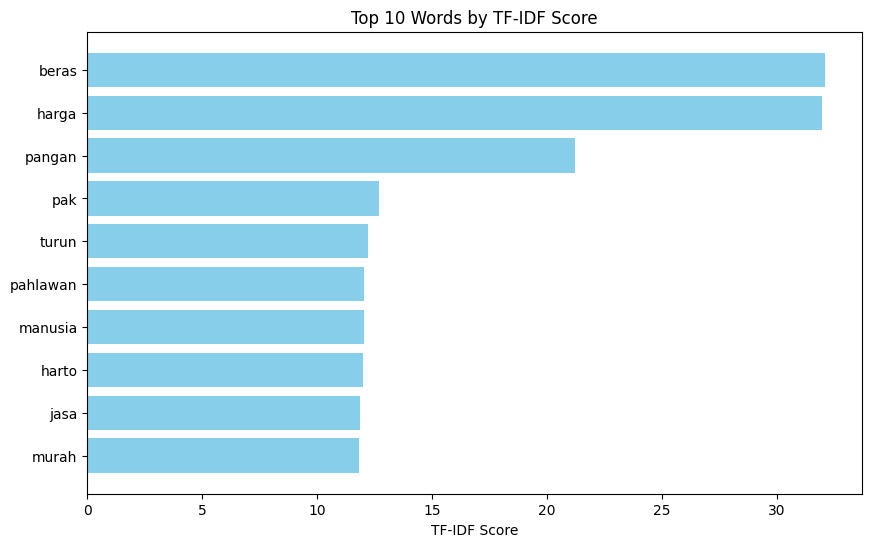

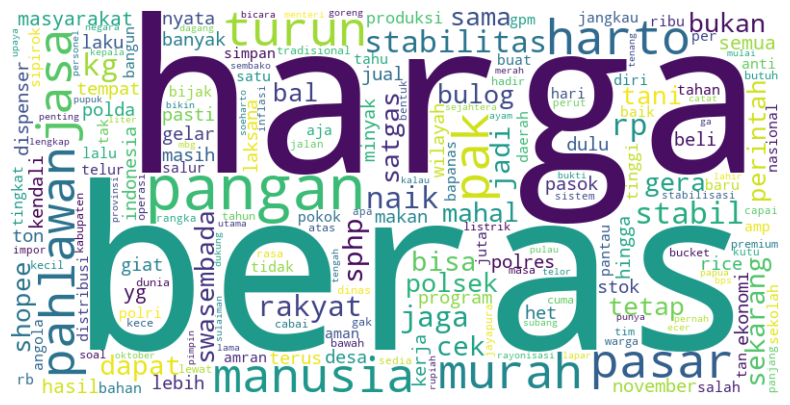

In [31]:
# Mendapatkan skor TF-IDF untuk setiap kata
tfidf_scores = X.sum(axis=0).A1
words = vectorizer.get_feature_names_out()
word_scores = pd.DataFrame(zip(words, tfidf_scores), columns=['word', 'score'])

# Mengurutkan kata-kata berdasarkan skor TF-IDF tertinggi
word_scores = word_scores.sort_values(by='score', ascending=False)

# Menampilkan kata-kata dengan skor TF-IDF tertinggi
display(word_scores.head(5))

# Mendapatkan skor TF-IDF untuk setiap kata
tfidf_scores = X.sum(axis=0).A1

# Membuat dataframe untuk kata dan skor TF-IDF
words = vectorizer.get_feature_names_out()
word_scores = pd.DataFrame(zip(words, tfidf_scores), columns=['word', 'score'])

# Mengurutkan kata-kata berdasarkan skor TF-IDF tertinggi
word_scores = word_scores.sort_values(by='score', ascending=False)

# Menampilkan 10 kata dengan skor TF-IDF tertinggi
top_words = word_scores.head(10)

# Membuat Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(top_words['word'], top_words['score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.title('Top 10 Words by TF-IDF Score')
plt.gca().invert_yaxis()  # Membalik sumbu Y agar kata dengan skor tertinggi di atas
plt.show()

# Membuat WordCloud dari kata-kata dan skor TF-IDF
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(word_scores['word'], word_scores['score'])))

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Summary** :
Melakukan ekstraksi fitur menggunakan *TFIDF* dengan bantuan library scikit-learn yaitu *TfidfVectorizer* memakai data bersih yang sudah melalui preprocessing. dan menampilkan 5 data teratas dari hasil ekstraksi serta memvisualisasi hasilnya menggunakan *Bar Chart* dan *WordCloud*  

# Analisis Sentimen Sederhana

In [22]:
# Translate data sebelum dilakukan pelabelan. library TextBlob hanya bisa memberikan sentimen terhadap data berbahasa inggris
def translate_inggris(kalimat):
     try:
          time.sleep(0.1)  # jeda untuk mencegah rate limit
          terjemahan = GoogleTranslator(source='id', target='en').translate(kalimat)
          return terjemahan.lower()
     except Exception as e:
        # Tampilkan kalimat yang gagal dan lanjutkan
        print(f"[Gagal menerjemahkan kalimat]: {kalimat}\n[error]: {e}")
        return kalimat

data_bersih['tweet_translated'] = data_bersih['clean_tweet'].apply(translate_inggris)
data_bersih

,clean_tweet,tweet_translated
0,gera pasar murah gpm terus laku hari perum bul...,cheap market movement gpm continues to sell to...
1,polsek kuala kencana gelar giat pasar murah ba...,kuala kenna police is holding an active cheap ...
2,polsek kuala kencana gelar giat pasar murah ba...,kuala kenna police is holding an active cheap ...
3,perintah terus kuat tahan pangan lalu luas dis...,"orders continue to be strong, food security an..."
4,ironi harga beras naik stok beras capai juta t...,"the irony is that rice prices have risen, rice..."
...,...,...
495,harga beras ketela turun papua gunung catat de...,"cassava rice prices fall, mount papua records ..."
496,kabar baik beberapa bahan makan justru turun h...,the good news is that some food ingredients ha...
497,monitoring harga beras pasar tradisional retai...,"monitoring rice prices in traditional markets,..."
498,rangka dukung program tahan pangan polsek suba...,in order to support the subang police's food s...


In [23]:
# Proses Pelabelan sentimen menggunakan TextBlob

def pelabelan_sentimen(kalimat_inggris):
    blob = TextBlob(kalimat_inggris)
    polarity = blob.sentiment.polarity
    if polarity > 0:
        sentimen = "positive"
    elif polarity == 0:
        sentimen = "neutral"
    else: 
        sentimen = "negative"
    return pd.Series([polarity, sentimen])

# data_bersih['label'] = data_bersih['ulasan_inggris'].apply(pelabelan_sentimen)
data_bersih[['polarity','sentimen']] = data_bersih['tweet_translated'].apply(pelabelan_sentimen)
data_bersih[['clean_tweet', 'tweet_translated','polarity', 'sentimen']].to_csv('labeled_tweet.csv', index=False)


In [32]:
df = pd.read_csv('labeled_tweet.csv')
df

,clean_tweet,tweet_translated,polarity,sentimen
0,gera pasar murah gpm terus laku hari perum bul...,cheap market movement gpm continues to sell to...,0.400000,positive
1,polsek kuala kencana gelar giat pasar murah ba...,kuala kenna police is holding an active cheap ...,0.126667,positive
2,polsek kuala kencana gelar giat pasar murah ba...,kuala kenna police is holding an active cheap ...,0.126667,positive
3,perintah terus kuat tahan pangan lalu luas dis...,"orders continue to be strong, food security an...",0.111111,positive
4,ironi harga beras naik stok beras capai juta t...,"the irony is that rice prices have risen, rice...",0.000000,neutral
...,...,...,...,...
495,harga beras ketela turun papua gunung catat de...,"cassava rice prices fall, mount papua records ...",0.000000,neutral
496,kabar baik beberapa bahan makan justru turun h...,the good news is that some food ingredients ha...,0.106667,positive
497,monitoring harga beras pasar tradisional retai...,"monitoring rice prices in traditional markets,...",0.100000,positive
498,rangka dukung program tahan pangan polsek suba...,in order to support the subang police's food s...,0.133333,positive


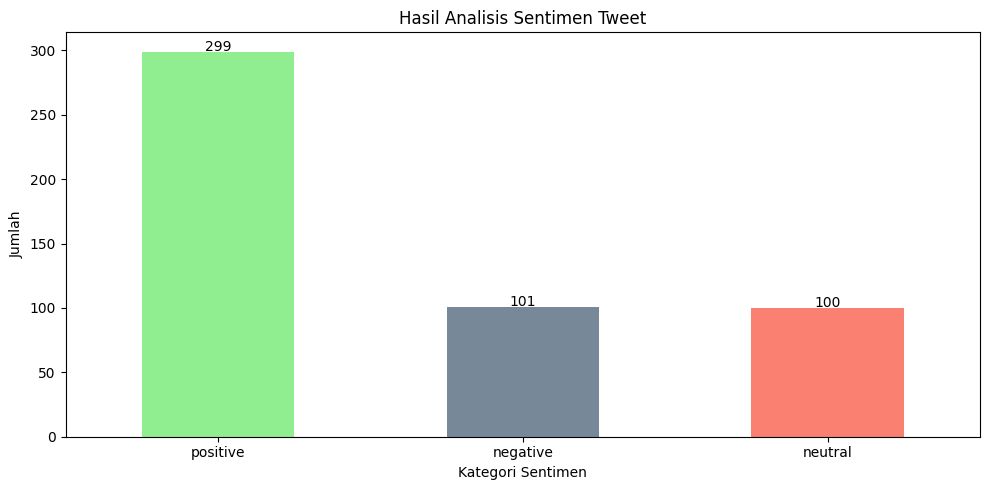

In [24]:
# Visualisasi hasil pelabelan
data_pelabelan = pd.read_csv('labeled_tweet.csv')
hitung_sentimen = data_pelabelan['sentimen'].value_counts()

# Buat bar chart
plt.figure(figsize=(10, 5))
hitung_sentimen.plot(kind='bar', color=['lightgreen', 'lightslategray', 'salmon'])

# Memberikan judul bar
plt.title('Hasil Analisis Sentimen Tweet')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

for i, v in enumerate(hitung_sentimen):
    plt.text(i, v + 0.5, str(v), ha='center')

# Tampilkan grafik
plt.tight_layout()
plt.show()

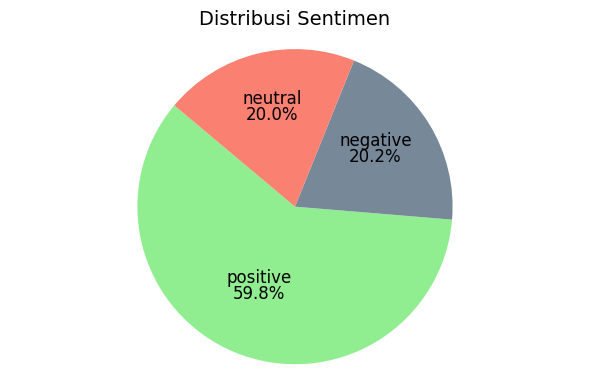

In [25]:
# Visualisasi distribusi hasil pelabelan
data_pelabelan = pd.read_csv('labeled_tweet.csv')
hitung_sentimen = data_pelabelan['sentimen'].value_counts()

# Buat bar chart
plt.figure(figsize=(6, 4))
colors = ['lightgreen', 'lightslategray', 'salmon']
wedges, texts, autotexts = plt.pie(
    hitung_sentimen,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

# Tambahkan label kategori di atas angka persentase
for i, (wedge, label) in enumerate(zip(wedges, hitung_sentimen.index)):
    theta = (wedge.theta2 + wedge.theta1) / 2.0  # sudut tengah irisan
    x = 0.6 * np.cos(np.deg2rad(theta))
    y = 0.6 * np.sin(np.deg2rad(theta))
    
    # Geser label ke atas sedikit dari persentase
    plt.text(x, y + 0.1, label, ha='center', va='center', fontsize=12)

# Tampilkan grafik
plt.title('Distribusi Sentimen', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Summary** :
Melakukan analisis sentimen sederhana menggunakan TextBlob dan memvisualisasikan hasilnya menggunakan *Pie Chart* dan *Bar Chart* 

# Visualisasi Word Cloud

## Word Cloud Positive

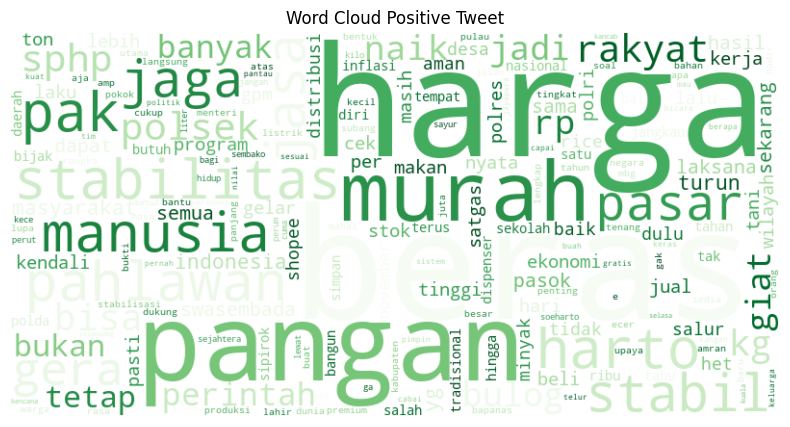

In [26]:
data_positif = pd.read_csv('labeled_tweet.csv')
positif = data_positif[data_positif['sentimen'] == 'positive']  
text = ' '.join(positif['clean_tweet'].astype(str))
word_freq = Counter(text.split())


wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="Greens"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Positive Tweet")
plt.show()

## Word Cloud Neutral

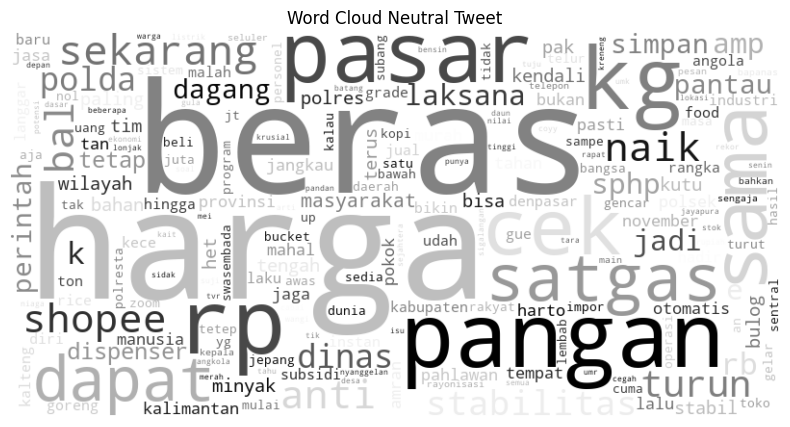

In [27]:
data_positif = pd.read_csv('labeled_tweet.csv')
positif = data_positif[data_positif['sentimen'] == 'neutral']  
text = ' '.join(positif['clean_tweet'].astype(str))
word_freq = Counter(text.split())


wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="gist_yerg"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Neutral Tweet")
plt.show()

## Word Cloud Negatif

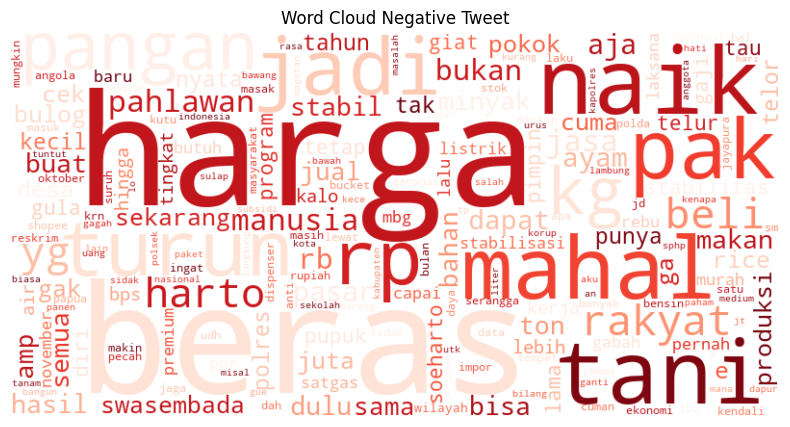

In [28]:
data_positif = pd.read_csv('labeled_tweet.csv')
positif = data_positif[data_positif['sentimen'] == 'negative']  
text = ' '.join(positif['clean_tweet'].astype(str))
word_freq = Counter(text.split())

wordcloud = WordCloud(
    max_font_size=160,
    width = 800,
    height = 400,
    background_color="white",
    colormap="Reds"
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Negative Tweet")
plt.show()

**Summary** :
Memvisualisasikan hasil analisis sentimen sederhana dari ketiga sentimen (Positive, Neutral, dan Negative) dalam bentuk *WordCloud*.